##### Below is a template for Asana's early career data science take-home assessment. Although we encourage candidates to use a similar format as below, feel free to make changes as needed!

### Data Ingestion

In [1]:
import pandas as pd
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [2]:
# How to read the data files in Python

import pandas as pd
users = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")
user_engagement = pd.read_csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

# How to read the data files in R

# users <- read.csv("https://s3.amazonaws.com/asana-data-interview/takehome_users-intern.csv")
# user_engagement <- read.csv("https://s3.amazonaws.com/asana-data-interview/takehome_user_engagement-intern.csv")

### 1) Calculating Adoption Rate

## Inspect users dataset

In [3]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com
5,6,12/17/13 3:37,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,yahoo.com
6,7,12/16/12 13:24,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,jourrapide.com
7,8,7/31/13 5:34,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,yahoo.com
8,9,11/5/13 4:04,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,hotmail.com
9,10,1/16/13 22:08,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,gustr.com


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
email_domain                  12000 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


### About _users_ dataset
The users dataset contains 11 columns and 12,000 entries that describe the users that signed up on Asana to use the product. The columns in the dataset are:
1. name: The user's name. This is the name of each customer that signed up for the product.
2. object_id: The user's id. This is an ID assigned to each customer that signed up for the product. The ID is assigned serially.
3. email: Email address. This is email address of each customer that signed up for the product.
4. email_domain: Domain of email address. This is the email provider for the email address of each customer that signed up for the product. e.g. gmail.com, hotmail.com, gustr.com, yahoomail.
5. creation_source: This feature specifies how each customer signed up for the product. This can either be </br>
    A. PERSONAL_PROJECTS: The customer was invited to join another user's personal workspace </br>
    B. GUEST_INVITE: The customer was invited to an organization as a guest. The customer has limited permissions </br>
    C. ORG_INVITE: The customer was invited to an organization. The customer is a full member </br>
    D. SIGNUP: The customer signed up via asana.com </br>
    E. SIGNUP_GOOGLE_AUTH: The customer signed up using Google Authentication (using a Google email account for their login id)</br>
6. creation_time: This specifies the date and time when the customer created the account
7. last_session_creation_time: unix timestamp of last login by the customer
8. opted_in_to_mailing_list: This specifies whether the customer have opted into receiving marketing emails
9. enabled_for_marketing_drip: This specifies whether the customer are on the regular marketing email drip
10. org_id: the organization (group of users) the customer belongs to
11. invited_by_user_id: This specifies the user who invited the customer to join the product (if applicable). 

There are null values in last_session_creation_time and invited_by_user_id columns. There are also columns that are not in the right data type, such columns are:
1. creation_time column is an object data type but should be a datetime data type </br>
2. last_session_creation_time column is a float data type but should be a datetime data type </br>

### Null values

In [5]:
null_lastSession_c_t = users["last_session_creation_time"].isnull().sum()
null_lastSession_c_t

3177

In [6]:
null_invitedBy_u_id = users["invited_by_user_id"].isnull().sum()
null_invitedBy_u_id

5583

In [7]:
(null_lastSession_c_t / len(users["last_session_creation_time"]) * 100)

26.474999999999998

In [8]:
(null_invitedBy_u_id / len(users["invited_by_user_id"]) * 100)

46.525

The users dataset contains two columns with null values:
1. last_session_creation_time has 3177 null values which is about 26.47% of the entire column </br>
2. invited_by_user_id has 5583 null values which is about 46.53% of the entire column </br>

## Inspect user_engagement dataset

In [9]:
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [10]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


### About _user_engagement_ dataset
The user_engagement dataset contains 3 columns and 207,917 entries that describe each user's log in activity on the product. The columns in the dataset are:
1. time_stamp: This specifies the date and time when the customer logged in to the product in a day. </br>
2. user_id: The user's id. This is an ID assigned to each customer that signed up for the product. The ID is assigned serially. </br>
3. visited: This indicates that a customer logged into the product at the specified date and time. </br>

While there is no null entry in the dataset, the time_stamp column is an object data type but should be a datetime data type. 

## Data cleaning

In [11]:
# Rename object_id column to a more descriptive name user_id

users.rename(columns = {"object_id" : "user_id"}, inplace = True)
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,4/22/14 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,yahoo.com
1,2,11/15/13 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,gustr.com
2,3,3/19/13 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,gustr.com
3,4,5/21/13 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,yahoo.com
4,5,1/17/13 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,yahoo.com


In [12]:
# convert the data types to the right data type

users["creation_time"] = pd.to_datetime(users["creation_time"], format="%m/%d/%y %H:%M")
users["last_session_creation_time"] = pd.to_datetime(users["last_session_creation_time"], unit="s")
user_engagement["time_stamp"] = pd.to_datetime(user_engagement["time_stamp"])

In [13]:
users

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,gustr.com
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,gmail.com
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,cuvox.de
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,iuxiw.com


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  email_domain                12000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)


In [15]:
user_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [16]:
# Null values

# The invited_by_user_id column specifies the user_id that invited the customer. 
# A null value indicates that the customer has no referrer
# Assign all null value a user_id that does not exist i.e 0.

users["invited_by_user_id"].fillna(0, inplace=True)

# last_session_creation_time indicates the last login by the customer. The last login time by a customer is also captured in the
# time_stamp column of user_engagement dataset so last_session_creation_time should be dropped.

users.drop(columns = ["last_session_creation_time"], inplace = True)
users.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,yahoo.com
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,gustr.com
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,gustr.com
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,yahoo.com
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,yahoo.com


### Creation of columns
Three new columns will be created in the user_engagement dataset, these columns will determine is a user is adopted user or not. The columns are:
1. week_num: This column will hold the week number each entry in the time_stamp column falls in.
2. Year: This column will be used to differentiate week number for different years. This will help track total visits by a customer in week 15 of year 2013 and differentiate it from the visit in week 15 of year 2014
3. is_adopted: This column will indicate is a user is an adopted user. A user will be considered an adopted user if the user logs into the product at least 3 times in any week. A value of 1 incates YES while a value of 0 indicates NO.

In [17]:
user_engagement

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [18]:
# Create the year column

user_engagement["year"] = user_engagement["time_stamp"].dt.strftime("%Y")

In [19]:
# Create the week_num column

user_engagement["week_num"] = user_engagement["time_stamp"].dt.isocalendar().week

In [20]:
user_engagement

,time_stamp,user_id,visited,year,week_num
0,2014-04-22 03:53:30,1,1,2014,17
1,2013-11-15 03:45:04,2,1,2013,46
2,2013-11-29 03:45:04,2,1,2013,48
3,2013-12-09 03:45:04,2,1,2013,50
4,2013-12-25 03:45:04,2,1,2013,52
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,2013,36
207913,2013-01-15 18:28:37,11997,1,2013,3
207914,2014-04-27 12:45:16,11998,1,2014,17
207915,2012-06-02 11:55:59,11999,1,2012,22


In [21]:
#  Get the number of times a customer visited the app in a week

grouped_user_engagement = user_engagement.groupby(["year","week_num","user_id"])["visited"].count().reset_index()
grouped_user_engagement

,year,week_num,user_id,visited
0,2012,1,69,1
1,2012,1,197,1
2,2012,1,445,1
3,2012,1,510,1
4,2012,1,639,1
...,...,...,...,...
69272,2014,23,11869,1
69273,2014,23,11885,1
69274,2014,23,11895,3
69275,2014,23,11906,1


In [22]:
# Generate list of adopted users.
# Adopted user is a customer who has at least 3 visits in at least one week number.

adopted_users = pd.DataFrame(grouped_user_engagement[grouped_user_engagement["visited"] >= 3]["user_id"].unique()
                            ).rename(columns = {0: "user_id"})

# Mark all users as adopted user
adopted_users["is_adopted"] = 1
adopted_users

,user_id,is_adopted
0,1693,1
1,728,1
2,11764,1
3,5297,1
4,6171,1
...,...,...
1439,7868,1
1440,7927,1
1441,9870,1
1442,10746,1


In [23]:
# Generate a list of users considered not adopted
# Not adopted users are users not found in the list of adopted users

not_adopted_users = []
for user in list(grouped_user_engagement.user_id.unique()):
    if user not in list(adopted_users.user_id):
        not_adopted_users.append(user)
        
not_adopted_users = pd.DataFrame(not_adopted_users).rename(columns = {0: "user_id"})
not_adopted_users

# mark all as not adopted
not_adopted_users["is_adopted"] = 0
not_adopted_users

,user_id,is_adopted
0,735,0
1,2624,0
2,2722,0
3,5730,0
4,7779,0
...,...,...
7374,4641,0
7375,6299,0
7376,7032,0
7377,8499,0


In [24]:
# Combine adopted_users and not_adopted_users

users_adoption = pd.concat([adopted_users, not_adopted_users], ignore_index=True)
users_adoption

,user_id,is_adopted
0,1693,1
1,728,1
2,11764,1
3,5297,1
4,6171,1
...,...,...
8818,4641,0
8819,6299,0
8820,7032,0
8821,8499,0


In [25]:
users_adoption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     8823 non-null   int64
 1   is_adopted  8823 non-null   int64
dtypes: int64(2)
memory usage: 138.0 KB


In [26]:
# Merge users_adoption dataset to users dataset

users = users.merge(users_adoption, on = "user_id", how = "outer")

In [27]:
users

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,is_adopted
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,yahoo.com,0.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,gustr.com,1.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,gustr.com,0.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,yahoo.com,0.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,yahoo.com,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,8263.0,gustr.com,0.0
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,gmail.com,0.0
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,8074.0,cuvox.de,0.0
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0.0,iuxiw.com,0.0


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  float64       
 9   email_domain                12000 non-null  object        
 10  is_adopted                  8823 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)


In [29]:
users.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
email_domain                     0
is_adopted                    3177
dtype: int64

is_adopted user has 3177 null values, this is same null values that occurred in last_session_creation_time column in the users dataset. The null values indicate that 3317 customers did not log back into the product after signing up. These users will be considered not adopted users.


In [30]:
# Fill null values with 0

users.fillna(0, inplace=True)
users.isna().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
email_domain                  0
is_adopted                    0
dtype: int64

#### Adoption rate

Adoption rate is calculated as the number of adopted users divided by the total number of user multiplied by 100. Adoption rate is expressed in percentage.

In [31]:
num_adopted_users = len(users[users["is_adopted"] == 1])
num_adopted_users

1444

In [32]:
total_users = len(users["is_adopted"])
total_users

12000

In [33]:
adoption_rate = (num_adopted_users / total_users) * 100 

adoption_rate

12.033333333333333

### Problem statement:
Asana would like to know how successful their product currently is at getting different types of users to adopt, this will help the product manager in making decisions about the initial experience users receive when they first create their accounts so that he/she can focus on improving this experience to increase adoption. The information that will help the manager to make informed decision are the adoption rate and factors that predict user adoption.

### The datasets available for this project are:
1. Users dataset that has 11 columns containing each customer's detail such as name, user Id, email address, creation time and last log in time, and organization Id. This dataset recorded 12,000 observations.
2. User_engagement: This dataset has 3 columns containing each user's login activity on the product such as user Id, time stamp and visited. The dataset maps the date and time each customer logs into the product. This dataset recorded 207,917 observations.

### Adoption rate
An adopted user is a user who logs into the product at least 3 times in any week. To be able to calculate the adoption rate, some columns were created from the user_engagement dataset, the columns are:
1. week_num: This column holds the week number each entry in the time_stamp column falls in.
2. year: This column differentiates week number for different years. This helped track total visits by a customer in week 15 of year 2013 and differentiate it from the visit in week 15 of year 2014
3. is_adopted: This column indicates whether or not a user is an adopted user. A value of 1 incates adopted user while a value of 0 indicates not adopted user.

The user_engagement dataset was wrangled to get adopted users. There were about 1,444 adopted users in the dataset, about 3,317 users that were not classified, this shows that the users did not log into the product after signup and they were considered not adopted users since they did not meet the criteria, and there were about 7,379 users that are not adopted users.

Total number of adopted users = 1,444 users
Total number of not adopted users = 10,556 users

Adoption rate = adopted users / total users * 100
Adoption rate =  12.0333%

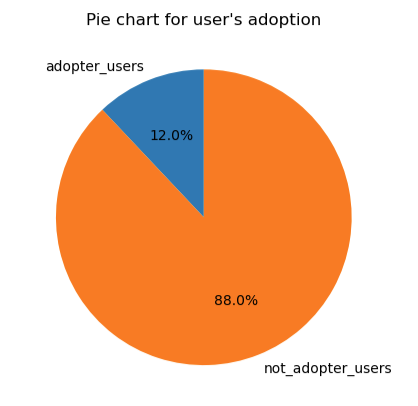

#### The data shows an adoption rate of about 12%

### 2) Methodology

In [34]:
users.head()

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,is_adopted
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,yahoo.com,0.0
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,gustr.com,1.0
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,gustr.com,0.0
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,yahoo.com,0.0
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,yahoo.com,0.0


In [35]:
# Generate creation_time_year, creation_time_month, creation_time_week_day and creation_time_of_day columns
# from creation_time column.
# This may help understand factors that influence user adoption.

users["creation_time_year"] = users["creation_time"].dt.strftime("%Y")
users["creation_time_month"] = users["creation_time"].dt.strftime("%B")
users["creation_time_week_day"] = users["creation_time"].dt.strftime("%A")
users["creation_time_hour"] = users["creation_time"].dt.strftime("%H")

In [36]:
users

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,is_adopted,creation_time_year,creation_time_month,creation_time_week_day,creation_time_hour
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,yahoo.com,0.0,2014,April,Tuesday,03
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,gustr.com,1.0,2013,November,Friday,03
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,gustr.com,0.0,2013,March,Tuesday,23
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,yahoo.com,0.0,2013,May,Tuesday,08
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,yahoo.com,0.0,2013,January,Thursday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,8263.0,gustr.com,0.0,2013,September,Friday,06
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,gmail.com,0.0,2013,January,Thursday,18
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,8074.0,cuvox.de,0.0,2014,April,Sunday,12
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0.0,iuxiw.com,0.0,2012,May,Thursday,11


In [37]:
# Generate creation_time_of_day column
# 05 to 11 is considered morning
# 12 to 16 is consiered afternoon
# 17 to 04 is considered night

def time_of_day(creation_time_hour):
    if  (int(creation_time_hour) >= 5 and int(creation_time_hour) <= 11):
        result = "Morning"
    elif  (int(creation_time_hour) >= 12 and int(creation_time_hour) <= 16):
        result = "Afternoon"
    else:
        result = "Night"
        
    return result

users["creation_time_of_day"] = users["creation_time_hour"].apply(time_of_day)

# Drop the creation_time_hour column that was used to create the creation_time_of_day column

users.drop(columns = "creation_time_hour", inplace = True)

In [38]:
users

,user_id,creation_time,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,is_adopted,creation_time_year,creation_time_month,creation_time_week_day,creation_time_of_day
0,1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1,0,11,10803.0,yahoo.com,0.0,2014,April,Tuesday,Night
1,2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,0,0,1,316.0,gustr.com,1.0,2013,November,Friday,Night
2,3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,0,0,94,1525.0,gustr.com,0.0,2013,March,Tuesday,Night
3,4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,0,0,1,5151.0,yahoo.com,0.0,2013,May,Tuesday,Morning
4,5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,0,0,193,5240.0,yahoo.com,0.0,2013,January,Thursday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:00,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,0,0,89,8263.0,gustr.com,0.0,2013,September,Friday,Morning
11996,11997,2013-01-10 18:28:00,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,gmail.com,0.0,2013,January,Thursday,Night
11997,11998,2014-04-27 12:45:00,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1,1,83,8074.0,cuvox.de,0.0,2014,April,Sunday,Afternoon
11998,11999,2012-05-31 11:55:00,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,0,0,6,0.0,iuxiw.com,0.0,2012,May,Thursday,Morning


In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          12000 non-null  float64       
 9   email_domain                12000 non-null  object        
 10  is_adopted                  12000 non-null  float64       
 11  creation_time_year          12000 non-null  object    

In [40]:
# Create the predictor variables. user_id, creation time, name and email describe each customer hence do not predict 
# the is_adopted variable

X = users.drop(columns = ["user_id", "creation_time", "name", "email", "is_adopted"])

# Create the predicted variable

y = users["is_adopted"]

In [41]:
X

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,creation_time_year,creation_time_month,creation_time_week_day,creation_time_of_day
0,GUEST_INVITE,1,0,11,10803.0,yahoo.com,2014,April,Tuesday,Night
1,ORG_INVITE,0,0,1,316.0,gustr.com,2013,November,Friday,Night
2,ORG_INVITE,0,0,94,1525.0,gustr.com,2013,March,Tuesday,Night
3,GUEST_INVITE,0,0,1,5151.0,yahoo.com,2013,May,Tuesday,Morning
4,GUEST_INVITE,0,0,193,5240.0,yahoo.com,2013,January,Thursday,Morning
...,...,...,...,...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,8263.0,gustr.com,2013,September,Friday,Morning
11996,SIGNUP_GOOGLE_AUTH,0,0,200,0.0,gmail.com,2013,January,Thursday,Night
11997,GUEST_INVITE,1,1,83,8074.0,cuvox.de,2014,April,Sunday,Afternoon
11998,PERSONAL_PROJECTS,0,0,6,0.0,iuxiw.com,2012,May,Thursday,Morning


In [42]:
y

0        0.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
11995    0.0
11996    0.0
11997    0.0
11998    0.0
11999    0.0
Name: is_adopted, Length: 12000, dtype: float64

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             12000 non-null  object 
 1   opted_in_to_mailing_list    12000 non-null  int64  
 2   enabled_for_marketing_drip  12000 non-null  int64  
 3   org_id                      12000 non-null  int64  
 4   invited_by_user_id          12000 non-null  float64
 5   email_domain                12000 non-null  object 
 6   creation_time_year          12000 non-null  object 
 7   creation_time_month         12000 non-null  object 
 8   creation_time_week_day      12000 non-null  object 
 9   creation_time_of_day        12000 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 937.6+ KB


In [44]:
# Create categorical variables for creation_source, creation_time_year,
# creation_time_month, creation_time_week_day, creation_time_of_day for the predictor variables

X = pd.get_dummies(X, columns = ["creation_source", "creation_time_year","creation_time_month",
                                 "creation_time_week_day", "creation_time_of_day"], dtype = int, drop_first = True)

In [45]:
X

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,email_domain,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,creation_time_year_2013,...,creation_time_month_October,creation_time_month_September,creation_time_week_day_Monday,creation_time_week_day_Saturday,creation_time_week_day_Sunday,creation_time_week_day_Thursday,creation_time_week_day_Tuesday,creation_time_week_day_Wednesday,creation_time_of_day_Morning,creation_time_of_day_Night
0,1,0,11,10803.0,yahoo.com,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0,0,1,316.0,gustr.com,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,94,1525.0,gustr.com,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,5151.0,yahoo.com,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,0,0,193,5240.0,yahoo.com,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,8263.0,gustr.com,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
11996,0,0,200,0.0,gmail.com,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,1
11997,1,1,83,8074.0,cuvox.de,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11998,0,0,6,0.0,iuxiw.com,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [46]:
# Frequency encoding for fields that are of object data type with many unique values
# org_id, invited_by_user_id and email_domain

org_id_cat = X["org_id"].value_counts(normalize = True)
X["org_id"] = X["org_id"].map(org_id_cat.to_dict())

invited_by_user_id_cat = X["invited_by_user_id"].value_counts(normalize = True)
X["invited_by_user_id"] = X["invited_by_user_id"].map(invited_by_user_id_cat.to_dict())

email_domain_cat = X["email_domain"].value_counts(normalize = True)
X["email_domain"] = X["email_domain"].map(email_domain_cat.to_dict())

##### 2a) Writeup associated with methodology

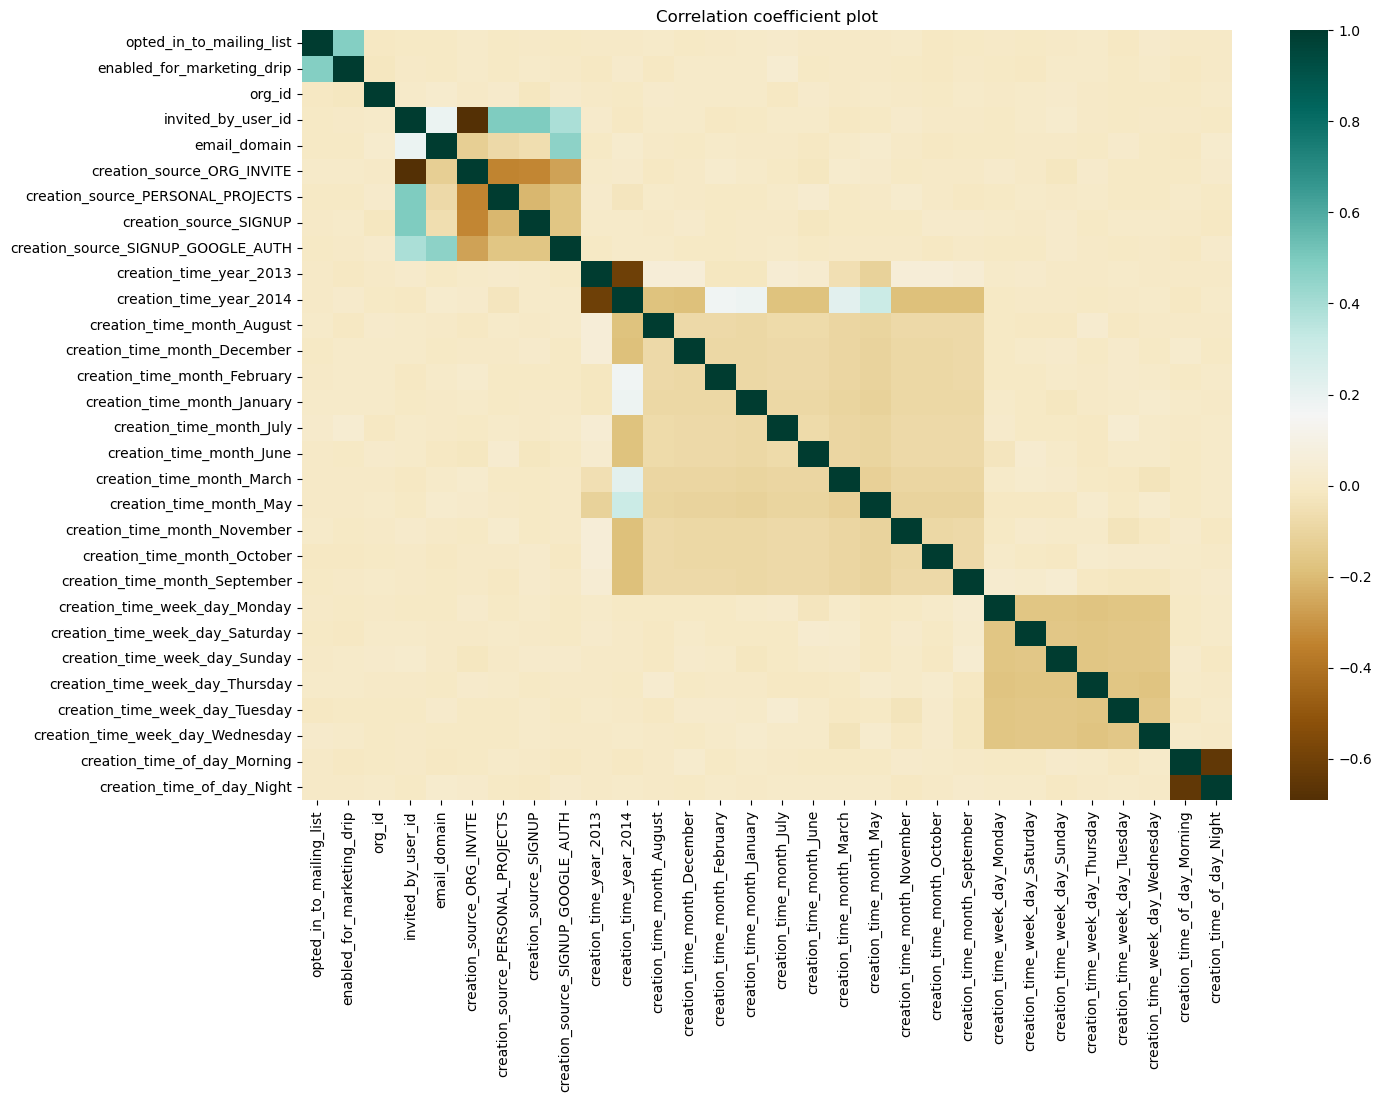

In [47]:
# Plot a correlation plot of fields in the dataset

plt.figure(figsize = (15, 10))
sns.heatmap(X.corr(), cmap= 'BrBG')
plt.title("Correlation coefficient plot");

There are no correlated variables in the data set

### Preparation for analysis:
In other to understand the factors that influence adoption rate, the 3 generated columns were merged to the users dataset. This added more information to each user in the dataset. 4 more columns were generated to further provide more information that can help in determining factors that influence user adoption. The 4 columns are:
1. creation_time_year: This tells us the year each user signed up in the product.
2. creation_time_month: This tells us the month name each user signed up in the product.
3. creation_time_week_day: This tells us the day between Sunday to Saturday each user signed up in the product. 
4. creation_time_of_day: This tells us the time of the day each user signed up in the product (Morning, afternoon or night time).

### Predictor variables
The predictor variables were generated from creation_source, creation_time_year,creation_time_month, creation_time_week_day and creation_time_of_day while is_adopted  was the predicted variable.

Some columns that are not compatible with machine learning algorithms were transformed, such columns are:
1. creation_source, creation_time_year,creation_time_month, creation_time_week_day and creation_time_of_day were transformed to nominal (unordered) categorical variables because the observation the contain holds no weight.
2. org_id, invited_by_user_id and email_domain were frequency encoded to ensure that it does not add more weight to the model than necessary.

### Variable Correlation
A correlation coefficient plot of the predictor variables was made to ensure that no correlated variables were fed to the algorithm, this is to avoid feeding duplicate information to the model and no two or more variables were correlated.

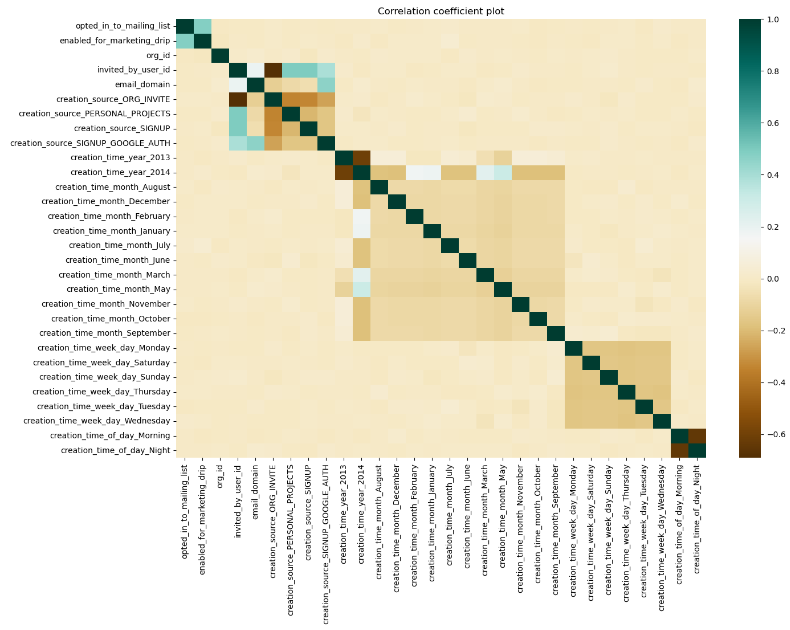

### 3) What Factors Predict User Adoption?

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
y_pred = rf_model.predict(X_test)

In [51]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.8720833333333333

In [52]:
rf_recall = recall_score(y_test, y_pred, pos_label=False)
rf_recall

0.99146110056926

In [53]:
rf_precision = precision_score(y_test, y_pred, pos_label=False)

In [54]:
rf_precision

0.8785203867171081

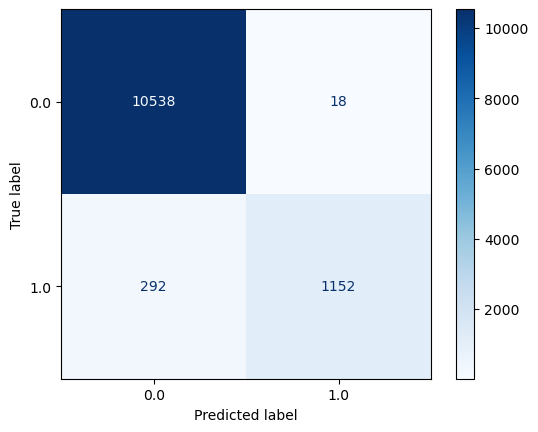

In [55]:
# Plot the confusion matrix of the model
ConfusionMatrixDisplay.from_estimator(rf_model, X, y, cmap = "Blues");

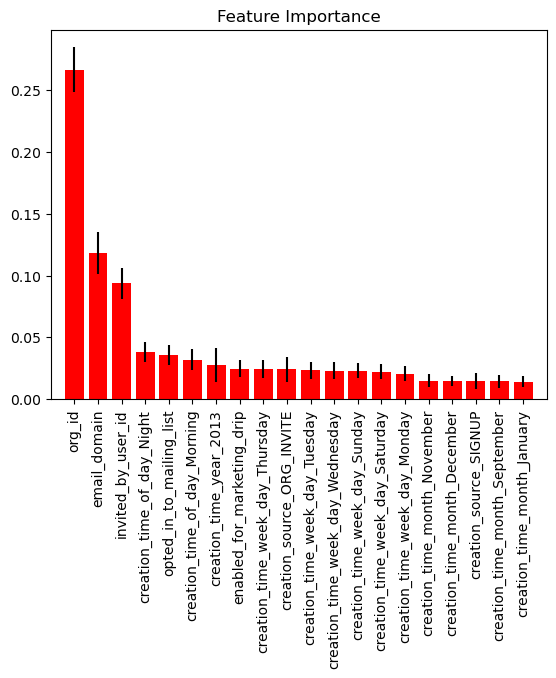

In [56]:
# Visualize the important features used by the model
skplt.estimators.plot_feature_importances(rf_model, feature_names=list(X.columns),x_tick_rotation=90);

In [57]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred = dt_model.predict(X_test)

In [59]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.79375

In [60]:
dt_recall = recall_score(y_test, y_pred,pos_label=False)
dt_recall

0.8761859582542695

In [61]:
dt_precision = precision_score(y_test, y_pred, pos_label=False)

In [62]:
dt_precision

0.8875540605478136

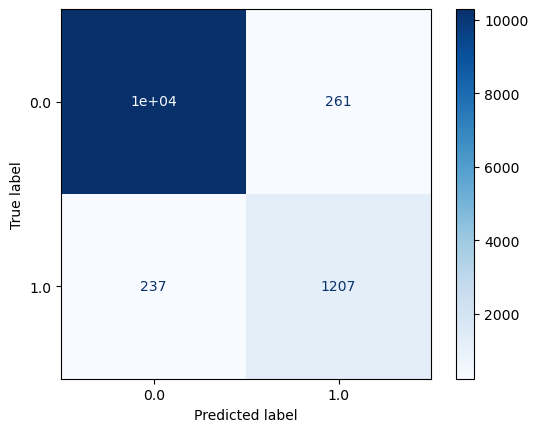

In [63]:
# Plot the confusion matrix of the model
ConfusionMatrixDisplay.from_estimator(dt_model, X, y, cmap = "Blues");

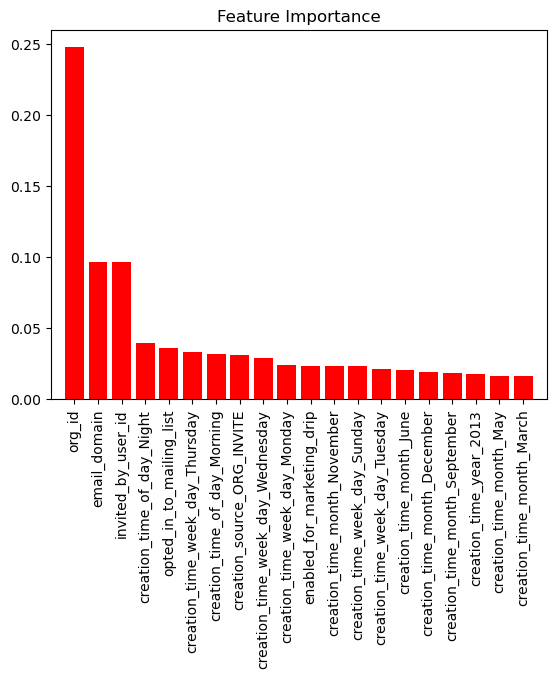

In [64]:
# Visualize the important features used by the model
skplt.estimators.plot_feature_importances(dt_model, feature_names=list(X.columns),x_tick_rotation=90);

##### 3a) Writeup associated with what factors predict user adoption?

### Performance score
The predictor and predicted variables were fed to two models, Random forest model and Decision tree model. Both models showed good performance scores
1. Random forest model:
    1. Accuracy score: 87%
    2. Precision score: 99%
    3. Recall score: 88%
2. Decision tree model:
    1. Accuracy score: 79%
    2. Precision score: 88%
    3. Recall score: 89%
    
What the scores mean: 
1. Accuracy score provides a broad view of how effective strategies are in correctly identifying both adopters users and non-adopter users
2. High precision ensures that your adoption efforts are focused on users who are likely to become loyal customers or active users. It minimizes the chances of annoying or alienating users who might not be interested
3. High recall ensures that you are not missing out on potential users who might have temporarily disengaged but could become active again with the right encouragement or improvements.

The scores above showed that the model performed but the Random forest model did better than Decicion tree model.

### Factors that affect user adoption

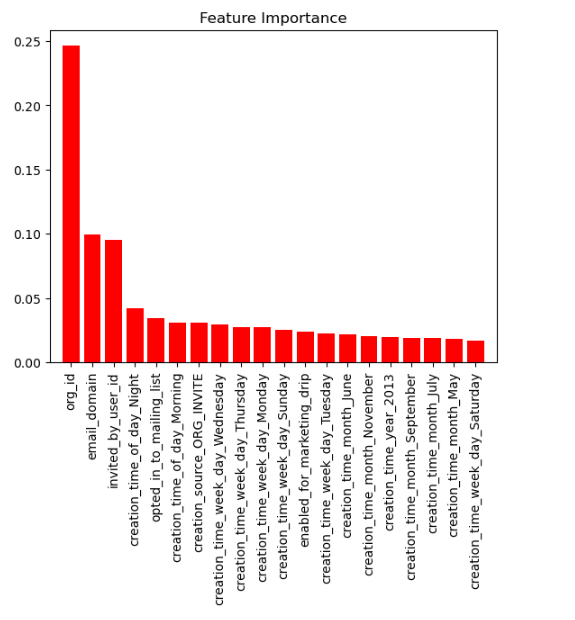

The variable importance plot from both models show that the top 5 features that affect user adoption are as follows in the following order:
1. org_id
2. email_domain
3. invited_by_user_id
4. creation_time_Night
5. opted_in_to_mailing_list


### 4) Additional Commentary (Optional)